# Explore, Visualize, and Analyze Data

In [1]:
%config IPCompleter.greedy=True
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Reading the datasets

In [2]:
train_data = pd.read_csv('dataset/train.csv', sep=',',low_memory=False)
store_data = pd.read_csv('dataset/store.csv', sep=',',low_memory=False)
train_data

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
5,6,5,2015-07-31,5651,589,1,1,0,1
6,7,5,2015-07-31,15344,1414,1,1,0,1
7,8,5,2015-07-31,8492,833,1,1,0,1
8,9,5,2015-07-31,8565,687,1,1,0,1
9,10,5,2015-07-31,7185,681,1,1,0,1


In [3]:
store_data

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
5,6,a,a,310.0,12.0,2013.0,0,NaN,NaN,NaN
6,7,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
7,8,a,a,7520.0,10.0,2014.0,0,NaN,NaN,NaN
8,9,a,c,2030.0,8.0,2000.0,0,NaN,NaN,NaN
9,10,a,a,3160.0,9.0,2009.0,0,NaN,NaN,NaN


### Description 
Making a first summary for eache table that gathers basic information such as the minima the maxima,the mean and the number of elements

In [4]:
train_data.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


In [5]:
store_data.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000
mean,558.00000,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,322.01708,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935
min,1.00000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,279.50000,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,558.00000,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,836.50000,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


## Cleaning the dataset
Here we are using pandas, thus, in order to clean our dataset we are going be to using some elementary strategies.
Depending on the amount of missing datas we either :

- Fill them following a chosen method such as the median or the mean when it comes to quantitatives datas
- Fill them following the previous or next value or by linear interpolation, polynomial or spline smoothing if we are dealing with time series data.
- Drop them if they are a few and form a group

Therefore in this case we have chose to drop them

In [6]:
#Dropping Null Data
store_data.corr()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
Store,1.000000,-0.027220,-0.050319,-0.004648,0.007486,0.007584,0.039640
CompetitionDistance,-0.027220,1.000000,-0.059126,0.025124,-0.145717,-0.060552,-0.109504
CompetitionOpenSinceMonth,-0.050319,-0.059126,1.000000,-0.052250,-0.011485,-0.035504,0.047815
CompetitionOpenSinceYear,-0.004648,0.025124,-0.052250,1.000000,-0.076520,-0.079984,0.006354
Promo2,0.007486,-0.145717,-0.011485,-0.076520,1.000000,NaN,NaN
Promo2SinceWeek,0.007584,-0.060552,-0.035504,-0.079984,NaN,1.000000,-0.217650
Promo2SinceYear,0.039640,-0.109504,0.047815,0.006354,NaN,-0.217650,1.000000


In [7]:
#Dropping Null Data
train_data = train_data.dropna()
train_data.corr()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
Store,1.000000,-0.000008,0.005126,0.024325,-0.000047,0.000058,0.000641
DayOfWeek,-0.000008,1.000000,-0.462125,-0.386445,-0.528963,-0.392925,-0.205388
Sales,0.005126,-0.462125,1.000000,0.894711,0.678472,0.452345,0.085124
Customers,0.024325,-0.386445,0.894711,1.000000,0.616768,0.316169,0.071568
Open,-0.000047,-0.528963,0.678472,0.616768,1.000000,0.295042,0.086171
Promo,0.000058,-0.392925,0.452345,0.316169,0.295042,1.000000,0.067483
SchoolHoliday,0.000641,-0.205388,0.085124,0.071568,0.086171,0.067483,1.000000


# Visualize Data

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc0b90a4e80>]], dtype=object)

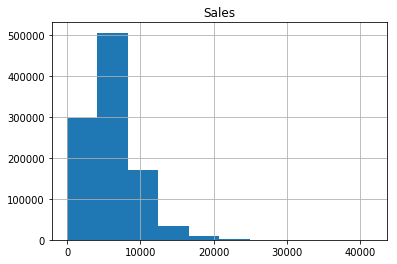

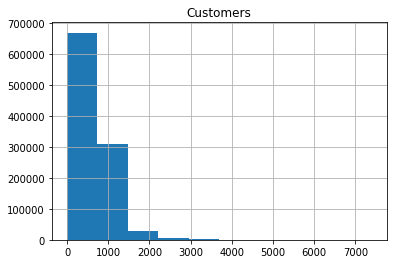

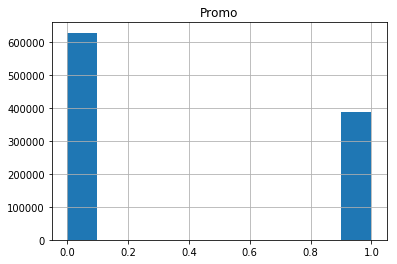

In [8]:
#Histrogramme for some entries of train data
train_data.hist(column='Sales')
train_data.hist(column='Customers')
train_data.hist(column='Promo')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc0b76434e0>]], dtype=object)

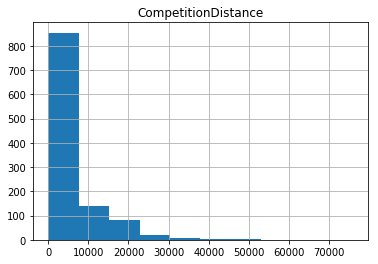

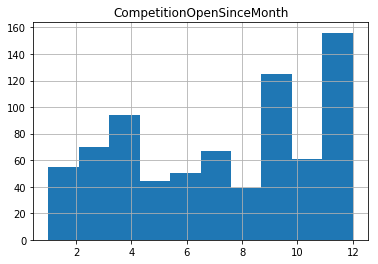

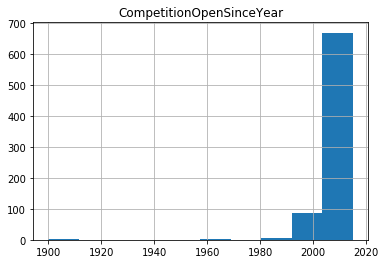

In [9]:
#Histrogramme for some entries of store data
store_data.hist(column='CompetitionDistance')
store_data.hist(column='CompetitionOpenSinceMonth')
store_data.hist(column='CompetitionOpenSinceYear')

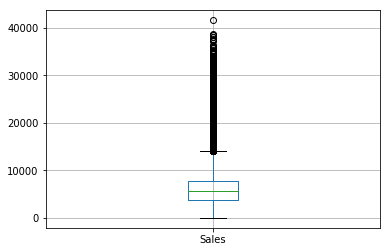

In [10]:
#Boxplot for some entries of train data
train_data.boxplot(column='Sales')


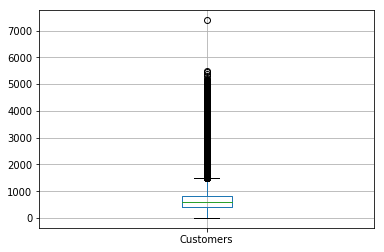

In [11]:
train_data.boxplot(column='Customers')

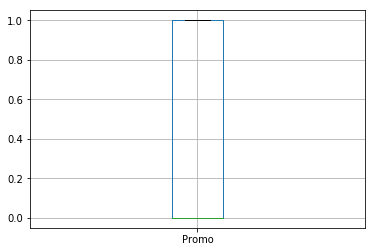

In [12]:
train_data.boxplot(column='Promo')

In [13]:
#Selection
store10k=train_data[train_data["Sales"]>10000][["Customers","Promo","SchoolHoliday"]]
store10k.describe()

,Customers,Promo,SchoolHoliday
count,113633.000000,113633.000000,113633.000000
mean,1392.229704,0.738175,0.221951
std,599.032002,0.439630,0.415560
min,216.000000,0.000000,0.000000
25%,999.000000,0.000000,0.000000
50%,1231.000000,1.000000,0.000000
75%,1573.000000,1.000000,0.000000
max,7388.000000,1.000000,1.000000


In [14]:
#Bivariate
#train_data.boxplot(column="Sales",by="Customers")
#plt.show()

In [15]:
#Contingency table
table=pd.crosstab(store_data["Store"],store_data["CompetitionOpenSinceMonth"])
print(table)

CompetitionOpenSinceMonth  1.0   2.0   3.0   4.0   5.0   6.0   7.0   8.0   \
Store                                                                       
1                             0     0     0     0     0     0     0     0   
2                             0     0     0     0     0     0     0     0   
3                             0     0     0     0     0     0     0     0   
4                             0     0     0     0     0     0     0     0   
5                             0     0     0     1     0     0     0     0   
6                             0     0     0     0     0     0     0     0   
7                             0     0     0     1     0     0     0     0   
8                             0     0     0     0     0     0     0     0   
9                             0     0     0     0     0     0     0     1   
10                            0     0     0     0     0     0     0     0   
11                            0     0     0     0     0     0     0     0   

# Echantillonage
When we are in front a huge dataset we can, before looking for a heavy configuration and as a first approximation,  draw a simple random sample in a uniform distribution.

In [16]:
N=1115
n=200  #Sample size
lin2skipe=[0] # skipping the first line
# We dont read N-n lines randomly chosen
lin2skipe.extend(np.random.choice(np.arange(1,N+1),
    (N-n),replace=False))
df_small=pd.read_csv("dataset/store.csv",
    skiprows=lin2skipe,header=None, 
    names=["Store","StoreType","Assortment","CompetitionDistance","CompetitionOpenSinceMont","CompetitionOpenSinceYear","Promo2","Promo2SinceWeek","Promo2SinceYear","PromoInterval"])
df_small

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMont,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,9,a,c,2030.0,8.0,2000.0,0,NaN,NaN,NaN
1,20,d,a,2340.0,5.0,2009.0,1,40.0,2014.0,"Jan,Apr,Jul,Oct"
2,21,c,c,550.0,10.0,1999.0,1,45.0,2009.0,"Jan,Apr,Jul,Oct"
3,22,a,a,1040.0,NaN,NaN,1,22.0,2012.0,"Jan,Apr,Jul,Oct"
4,23,d,a,4060.0,8.0,2005.0,0,NaN,NaN,NaN
5,25,c,a,430.0,4.0,2003.0,0,NaN,NaN,NaN
6,26,d,a,2300.0,NaN,NaN,0,NaN,NaN,NaN
7,39,a,a,260.0,10.0,2006.0,1,31.0,2013.0,"Feb,May,Aug,Nov"
8,40,a,a,180.0,NaN,NaN,1,45.0,2009.0,"Feb,May,Aug,Nov"
9,46,c,a,1200.0,9.0,2005.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"


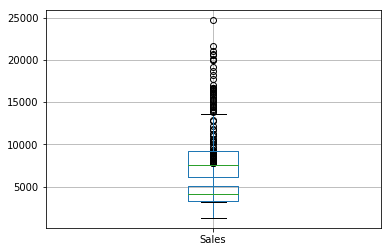

In [17]:
no_promo = train_data[train_data['Promo']==0]
promo = train_data[train_data['Promo']==1]
train_no_promo = no_promo.groupby('Store').mean()
train_promo = promo.groupby('Store').mean()
train_no_promo.boxplot(column='Sales')
train_promo.boxplot(column='Sales')

In [18]:
join = train_data.join(store_data.set_index('Store'),on='Store')
join.groupby('Store').mean()

,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
Store,,,,,,,,,,,,
1,3.997877,3945.704883,467.646497,0.829087,0.382166,0.204883,1270.0,9.0,2008.0,0.0,NaN,NaN
2,3.997877,4122.991507,486.045648,0.832272,0.382166,0.177282,570.0,11.0,2007.0,1.0,13.0,2010.0
3,3.997877,5741.253715,620.286624,0.826964,0.382166,0.180467,14130.0,12.0,2006.0,1.0,14.0,2011.0
4,3.997877,8021.769639,1100.057325,0.832272,0.382166,0.183652,620.0,9.0,2009.0,0.0,NaN,NaN
5,3.997877,3867.110403,444.360934,0.826964,0.382166,0.182590,29910.0,4.0,2015.0,0.0,NaN,NaN
6,3.997877,4562.375796,525.990446,0.828025,0.382166,0.182590,310.0,12.0,2013.0,0.0,NaN,NaN
7,3.997877,7356.902335,791.474522,0.834395,0.382166,0.168790,24000.0,4.0,2013.0,0.0,NaN,NaN
8,3.997877,4610.251592,547.799363,0.832272,0.382166,0.168790,7520.0,10.0,2014.0,0.0,NaN,NaN
9,3.997877,5426.816348,479.487261,0.826964,0.382166,0.180467,2030.0,8.0,2000.0,0.0,NaN,NaN


In [44]:
train_store = pd.merge(train_data, store_data, how = 'inner', on = 'Store')
test = train_store.groupby('StoreType')['Sales'].describe()
test

StoreType       
a          count    551627.000000
           mean       5738.179710
           std        3964.028134
           min           0.000000
           25%        3508.000000
           50%        5618.000000
           75%        7860.000000
           max       41551.000000
b          count     15830.000000
           mean      10058.837334
           std        5280.525506
           min           0.000000
           25%        6227.000000
           50%        9025.500000
           75%       13082.750000
           max       38722.000000
c          count    136840.000000
           mean       5723.629246
           std        3721.700886
           min           0.000000
           25%        3789.000000
           50%        5766.000000
           75%        7849.000000
           max       31448.000000
d          count    312912.000000
           mean       5641.819243
           std        3473.393781
           min           0.000000
           25%        3986.0000